In [2]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Get the stock quote
df = web.DataReader('AAPL',data_source ='yahoo',start = '2016-01-01')
# print(df)

data = pd.DataFrame(df, columns=['Close'])
# data.drop(index=0, columns='Close')
# data['Close']
data.head()

,Close
Date,
2016-01-04,26.337500
2016-01-05,25.677500
2016-01-06,25.174999
2016-01-07,24.112499
2016-01-08,24.240000


In [15]:
y = data['Close']
data_len_org = len(y)
x=[]
for i in range(0,data_len_org):
  x.append(i)

print(len(x))
xtmp =np.array(x).reshape(-1,1)
ytmp =np.array(y).reshape(-1,1)

# xtmp=pd.DataFrame(xtmp)
# ytmp=pd.DataFrame(ytmp)

1288


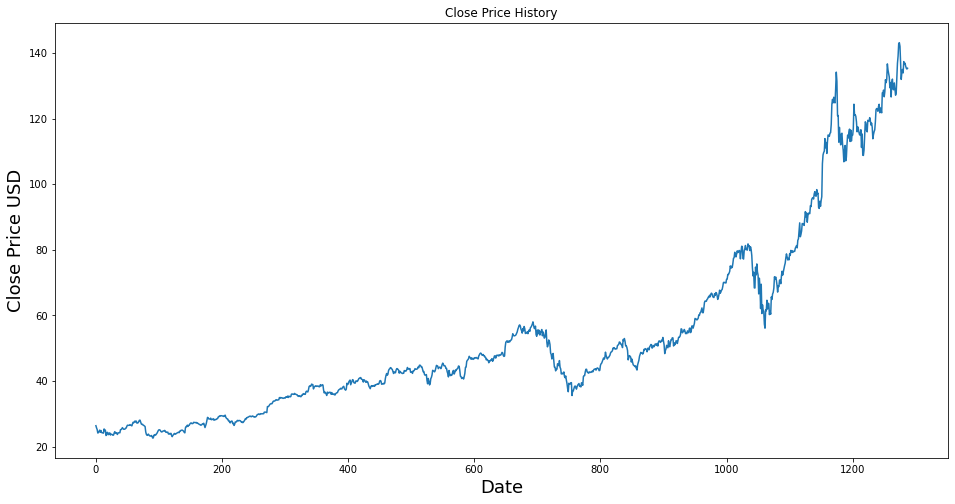

In [16]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(xtmp,ytmp)
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Close Price USD", fontsize=18)
plt.show()

In [17]:
#Predict the next days
print(len(y))
training_data_len = math.ceil(len(y)*.8)
print(training_data_len)

X_train =xtmp[0:training_data_len-60]
Y_train =ytmp[0:training_data_len-60]

X_test =xtmp[training_data_len-60:training_data_len]
Y_test =ytmp[training_data_len-60:training_data_len]
X_train.shape

1288
1031


(971, 1)

In [21]:
#Building Model
model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

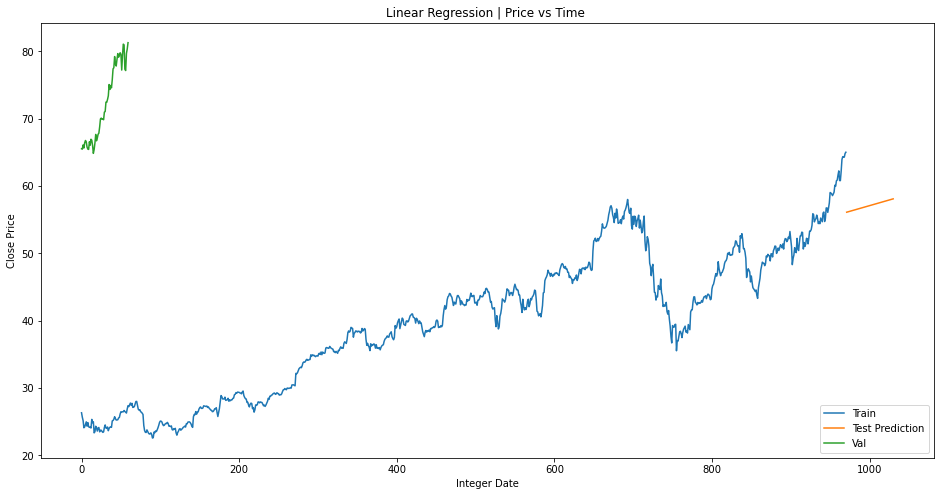

In [22]:
#Plot the predicted data
plt.figure(figsize = (16,8))
plt.title('Linear Regression | Price vs Time ')
plt.plot(X_train,Y_train)
plt.plot(X_test,predictions,Y_test, label='Predicted Price')
plt.legend(['Train','Test Prediction','Val'],loc='lower right')
plt.xlabel('Integer Date')
plt.ylabel('Close Price')
plt.show()

In [23]:
# Split the data to test , train
data_len = len(x)
data_len_fiftydays = data_len
sample_times = 20          #The Day how often the data will be predicted 
data_len = data_len/sample_times
data_len = int(data_len)
print(data_len,"asd")

64 asd


In [24]:
#Adding extra 50 days for predicting last 50 days
dayarray=[]
for i in range(0,data_len):
  dayarray.append(i*sample_times)

lastfiftydays=[]
for i in range(0,data_len_org+sample_times):
  lastfiftydays.append(i)
print(len(lastfiftydays))
lastfiftydays = pd.DataFrame(lastfiftydays)

count =1

1308


KeyError: (slice(None, None, None), None)

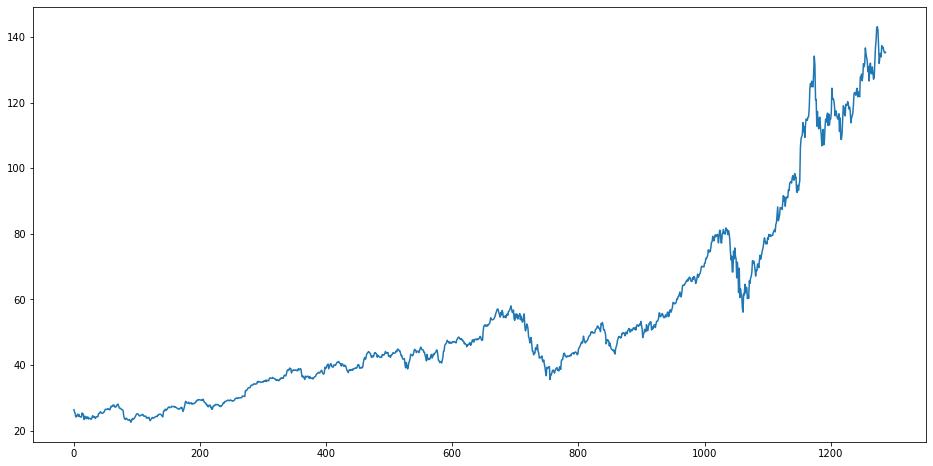

In [25]:
#Predict for every 50 days.
lnmodel = LinearRegression()
plt.figure(figsize=(16,8))
plt.plot(xtmp,ytmp)
for i in dayarray:
  lnmodel.fit(xtmp[i:i+sample_times],ytmp[i:i+sample_times])
  lnprediction = lnmodel.predict(lastfiftydays[i+sample_times:i+sample_times+sample_times])
  plt.plot(lastfiftydays[i+sample_times:i+sample_times+sample_times],lnprediction)
  
  R2 = lnmodel.score(xtmp[i:i+sample_times],ytmp[i:i+sample_times])
  Slope =lnmodel.coef_
  print("R2 for ", count,". Prediction:",R2,"Slope :" , Slope)
  count=count+1

plt.legend(['Data','Predictions'],loc='lower right')

In [26]:
#Get the slopes
slopemodel = LinearRegression()
slopearray = []
for i in dayarray:
  slopemodel.fit(xtmp[i:i+sample_times],ytmp[i:i+sample_times])
  lnprediction = slopemodel.predict(lastfiftydays[i+sample_times:i+sample_times+sample_times])
  new_slope = np.asscalar(slopemodel.coef_)
  slopearray.append(new_slope)

<ipython-input-26-168b61128ff6>:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  new_slope = np.asscalar(slopemodel.coef_)
<ipython-input-26-168b61128ff6>:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  new_slope = np.asscalar(slopemodel.coef_)
<ipython-input-26-168b61128ff6>:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  new_slope = np.asscalar(slopemodel.coef_)
<ipython-input-26-168b61128ff6>:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  new_slope = np.asscalar(slopemodel.coef_)
<ipython-input-26-168b61128ff6>:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  new_slope = np.asscalar(slopemodel.coef_)
<ipython-input-26-168b61128ff6>:7: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  new_slope = np.asscalar(slopemodel

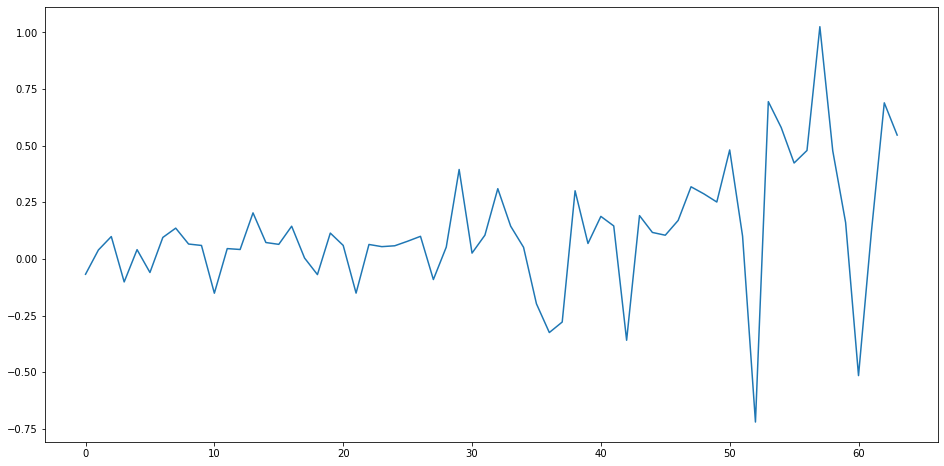

In [27]:
#Slopes
plt.figure(figsize=(16,8))
plt.plot(slopearray)

In [28]:
#Configure slopes -1 and 1
for i in range (0,len(dayarray)):
  if slopearray[i]>0:
    slopearray[i]=1
  elif slopearray[i]<0:
    slopearray[i]=-1
  elif slopearray[i]==0:
    slopearray[i]=0

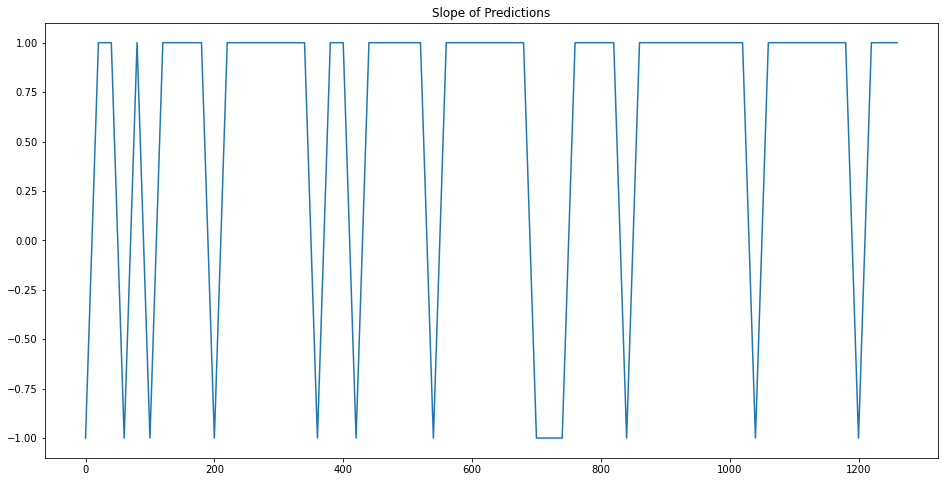

In [29]:
#Plot the slopes
plt.figure(figsize=(16,8))
plt.title("Slope of Predictions")
plt.plot(dayarray,slopearray)
plt.show()

In [30]:
#Slope training LSTM

a_train_len =math.ceil(len(slopearray)*.8)
a_slopearray=pd.DataFrame(slopearray)
a_slopearray=a_slopearray.values
a_slopearray

array([[-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1]], dtype=int64)

In [31]:
#Train and Test
a_train_data=a_slopearray[0:a_train_len,:]
a_xtrain=[]
a_ytrain=[]

for i in range(10,len(a_train_data)):
  a_xtrain.append(a_train_data[i-10:i,0])
  a_ytrain.append(a_train_data[i,0])
  if i <=11:
    print(a_xtrain)
    print(a_ytrain)

a_xtrain, a_ytrain= np.array(a_xtrain),np.array(a_ytrain)
a_xtrain=np.reshape(a_xtrain,(a_xtrain.shape[0],a_xtrain.shape[1],1))
a_xtrain.shape

[array([-1,  1,  1, -1,  1, -1,  1,  1,  1,  1], dtype=int64)]
[-1]
[array([-1,  1,  1, -1,  1, -1,  1,  1,  1,  1], dtype=int64), array([ 1,  1, -1,  1, -1,  1,  1,  1,  1, -1], dtype=int64)]
[-1, 1]


(42, 10, 1)

In [33]:
#Libraries for LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

#Build the LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(a_xtrain.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25)) #25 Neuron
model.add(Dense(1))

In [34]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [35]:
model.fit(a_xtrain,a_ytrain,batch_size=1,epochs=100) 
#This epoch is number of steps

Epoch 1/100
42/42 [==============================] - 3s 4ms/step - loss: 0.9617
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 1.0269
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 0.7829
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 0.6106
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 0.4824
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 0.7652
Epoch 7/100
42/42 [==============================] - 0s 5ms/step - loss: 0.7396
Epoch 8/100
42/42 [==============================] - 0s 4ms/step - loss: 0.8536
Epoch 9/100
42/42 [==============================] - 0s 4ms/step - loss: 0.5922A: 0s - loss: 0.3
Epoch 10/100
42/42 [==============================] - 0s 5ms/step - loss: 0.5800
Epoch 11/100
42/42 [==============================] - 0s 6ms/step - loss: 0.7828
Epoch 12/100
42/42 [==============================] - 0s 4ms/step - loss: 0.4475
Epoch 13/100
42/42 [

In [36]:
test_data = a_slopearray[a_train_len-10:,:]
a_xtest =[]
a_ytest =a_slopearray[a_train_len:,:]
for i in range(10,len(test_data)):
  a_xtest.append(test_data[i-10:i,0])

a_xtest = np.array(a_xtest) 
a_xtest = np.reshape(a_xtest,(a_xtest.shape[0],a_xtest.shape[1],1))

predictions = model.predict(a_xtest)
print(predictions," , ",a_ytest)

[[ 1.1483414 ]
 [-1.4459631 ]
 [-1.2636348 ]
 [-0.6511306 ]
 [ 0.48423105]
 [ 0.86794156]
 [ 1.0391062 ]
 [ 0.9961926 ]
 [-0.49397057]
 [ 0.14381462]
 [ 0.7426193 ]
 [-0.6511306 ]]  ,  [[-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]]


In [37]:
rmse = np.sqrt(np.mean(predictions-a_ytest)**2)
rmse

0.5902985831101736

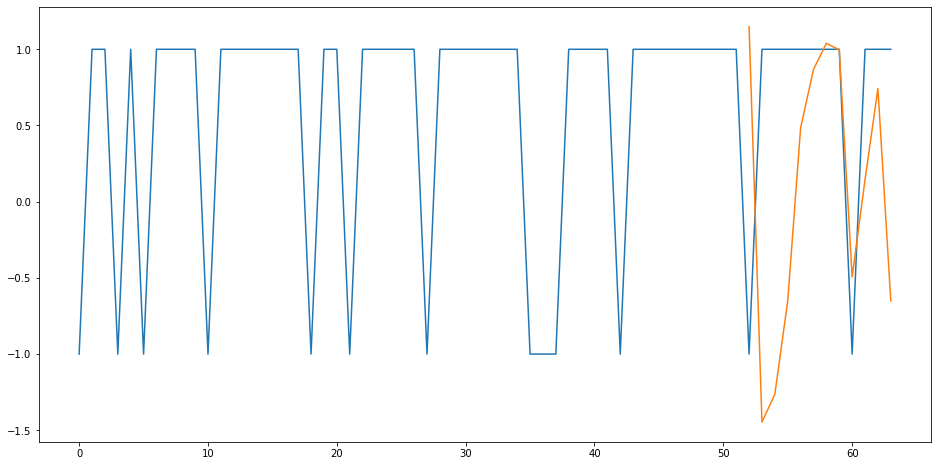

In [38]:
length = xtmp[a_train_len:len(a_slopearray)]

plt.figure(figsize=(16,8))
plt.plot(a_slopearray)
plt.plot(length,predictions)

In [39]:
new_samples = sample_times*length
new_samples

rising=[]
falling=[]

for i in range(0,len(predictions)):
  if predictions[i]>0:
    rising.append((i+44)*sample_times)
  elif predictions[i]<0:
    falling.append((i+44)*sample_times)

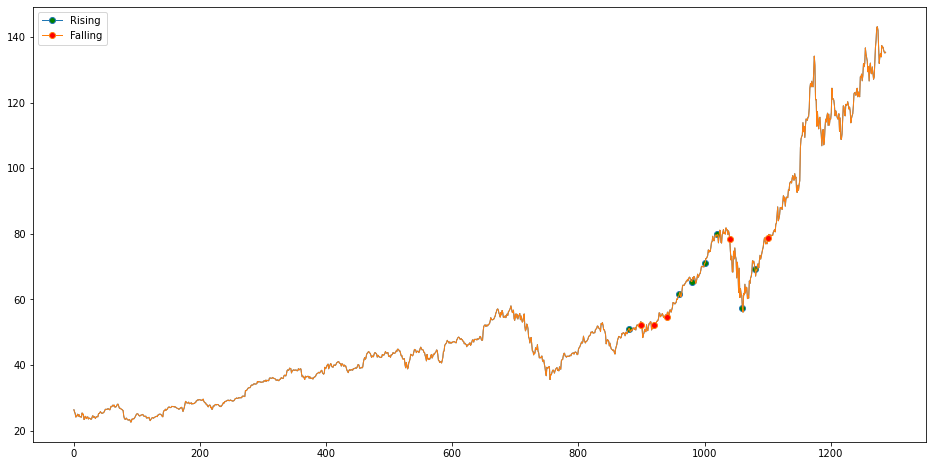

In [40]:
plt.figure(figsize=(16,8))
plt.plot(xtmp,ytmp,marker='o',markevery=rising,markerfacecolor='green',linewidth=1)
plt.plot(xtmp,ytmp,marker='o',markevery=falling,markerfacecolor='red',linewidth=1)
plt.legend(['Rising',"Falling"])